Individual Regression Results:
Predictor  Coefficient  P-value
       ZN     -0.07393  0.00001
    INDUS      0.50978  0.00000
     CHAS     -1.89278  0.20943
      NOX     31.24853  0.00000
       RM     -2.68405  0.00000
      AGE      0.10779  0.00000
      DIS     -1.55090  0.00000
      RAD      0.61791  0.00000
      TAX      0.02974  0.00000
  PTRATIO      1.15198  0.00000
        B     -0.03628  0.00000
    LSTAT      0.54880  0.00000
     MEDV     -0.36316  0.00000


Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.57e-56
Time:                        20:25:03   Log-Likelihood:                -1653.3
No. Observations

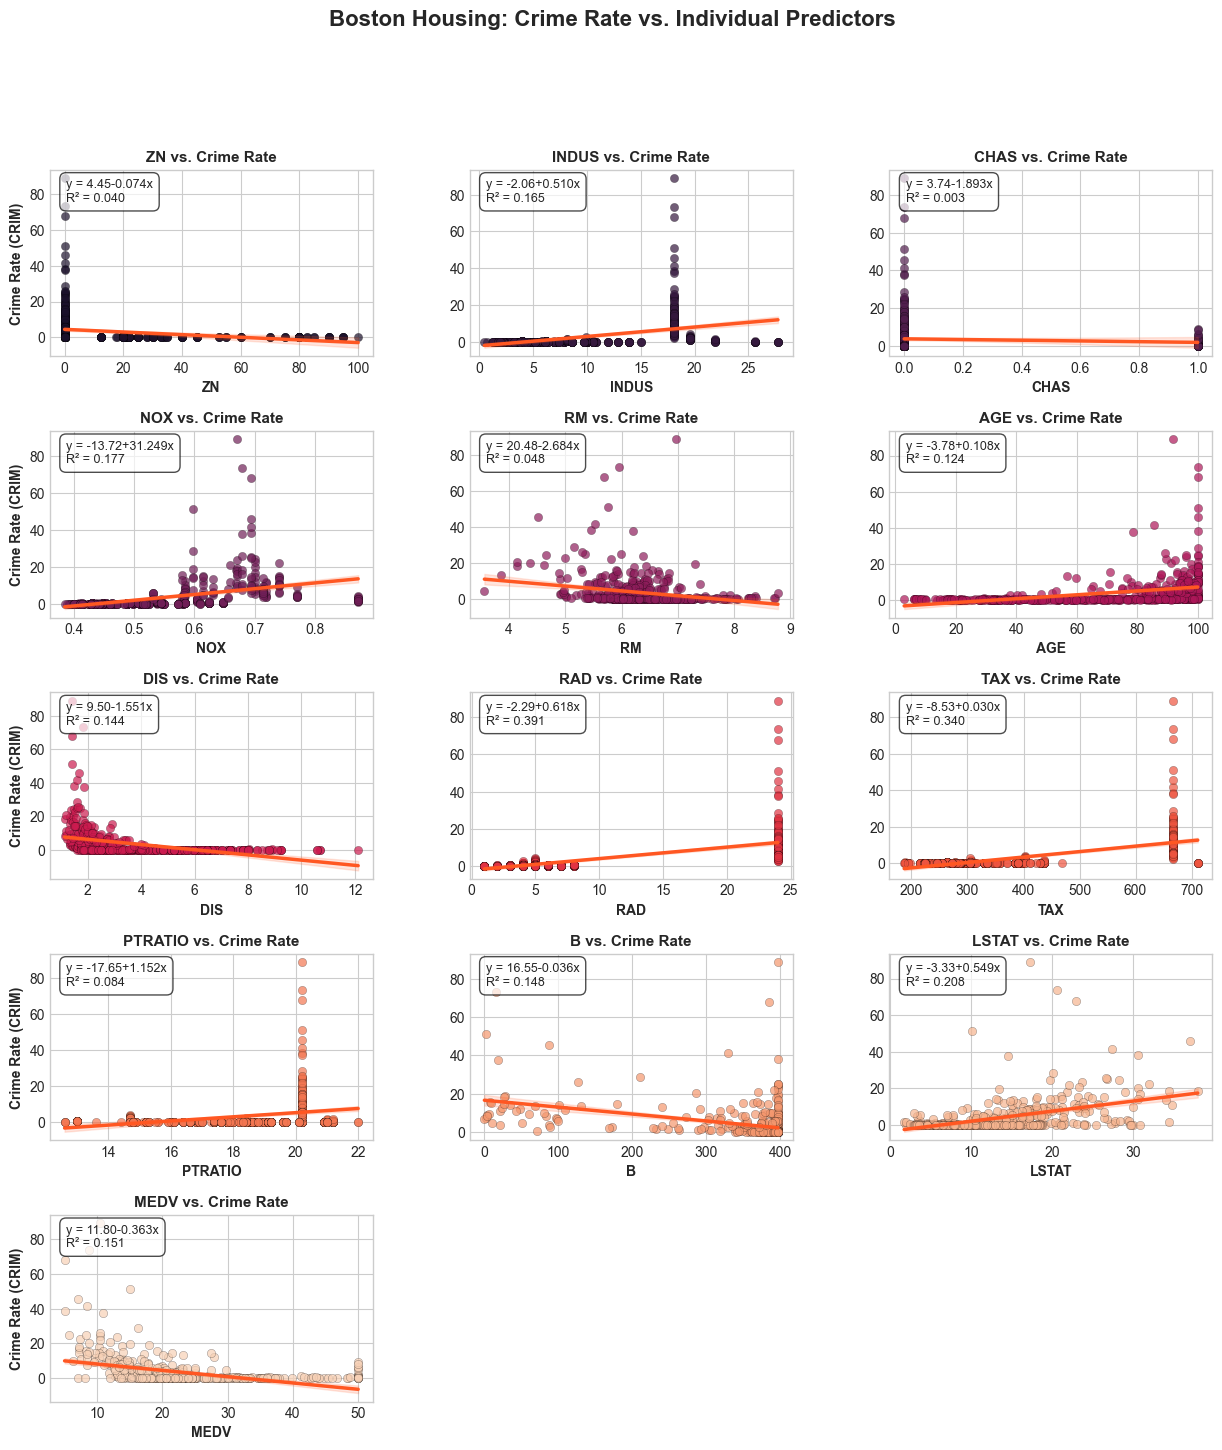

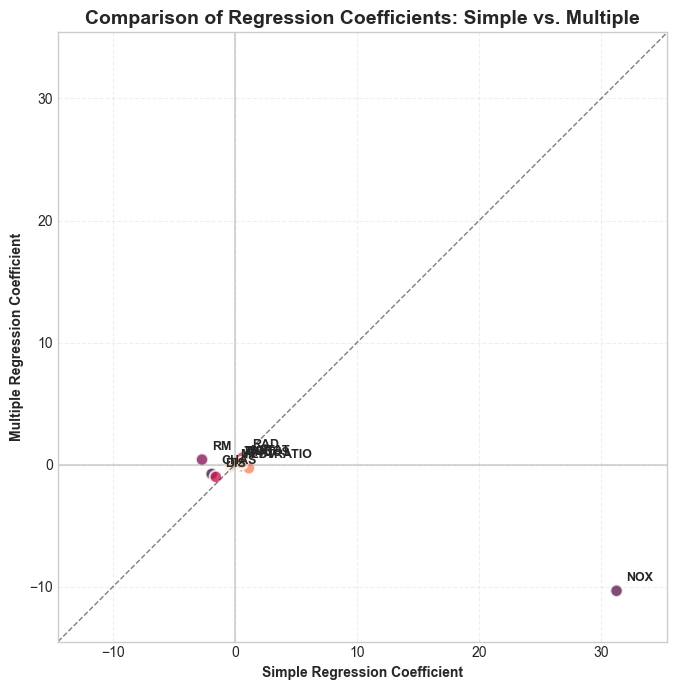


Coefficient Comparison:
Predictor  Simple Regression  Multiple Regression
       ZN           -0.07393              0.04486
    INDUS            0.50978             -0.06385
     CHAS           -1.89278             -0.74913
      NOX           31.24853            -10.31353
       RM           -2.68405              0.43013
      AGE            0.10779              0.00145
      DIS           -1.55090             -0.98718
      RAD            0.61791              0.58821
      TAX            0.02974             -0.00378
  PTRATIO            1.15198             -0.27108
        B           -0.03628             -0.00754
    LSTAT            0.54880              0.12621
     MEDV           -0.36316             -0.19889


(d) Cubic Regression Models:
Testing for non-linear associations with cubic terms


/var/folders/2h/48s77_8j28s5ytdwtmlhh4ww0000gn/T/ipykernel_23486/3619198186.py:253: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


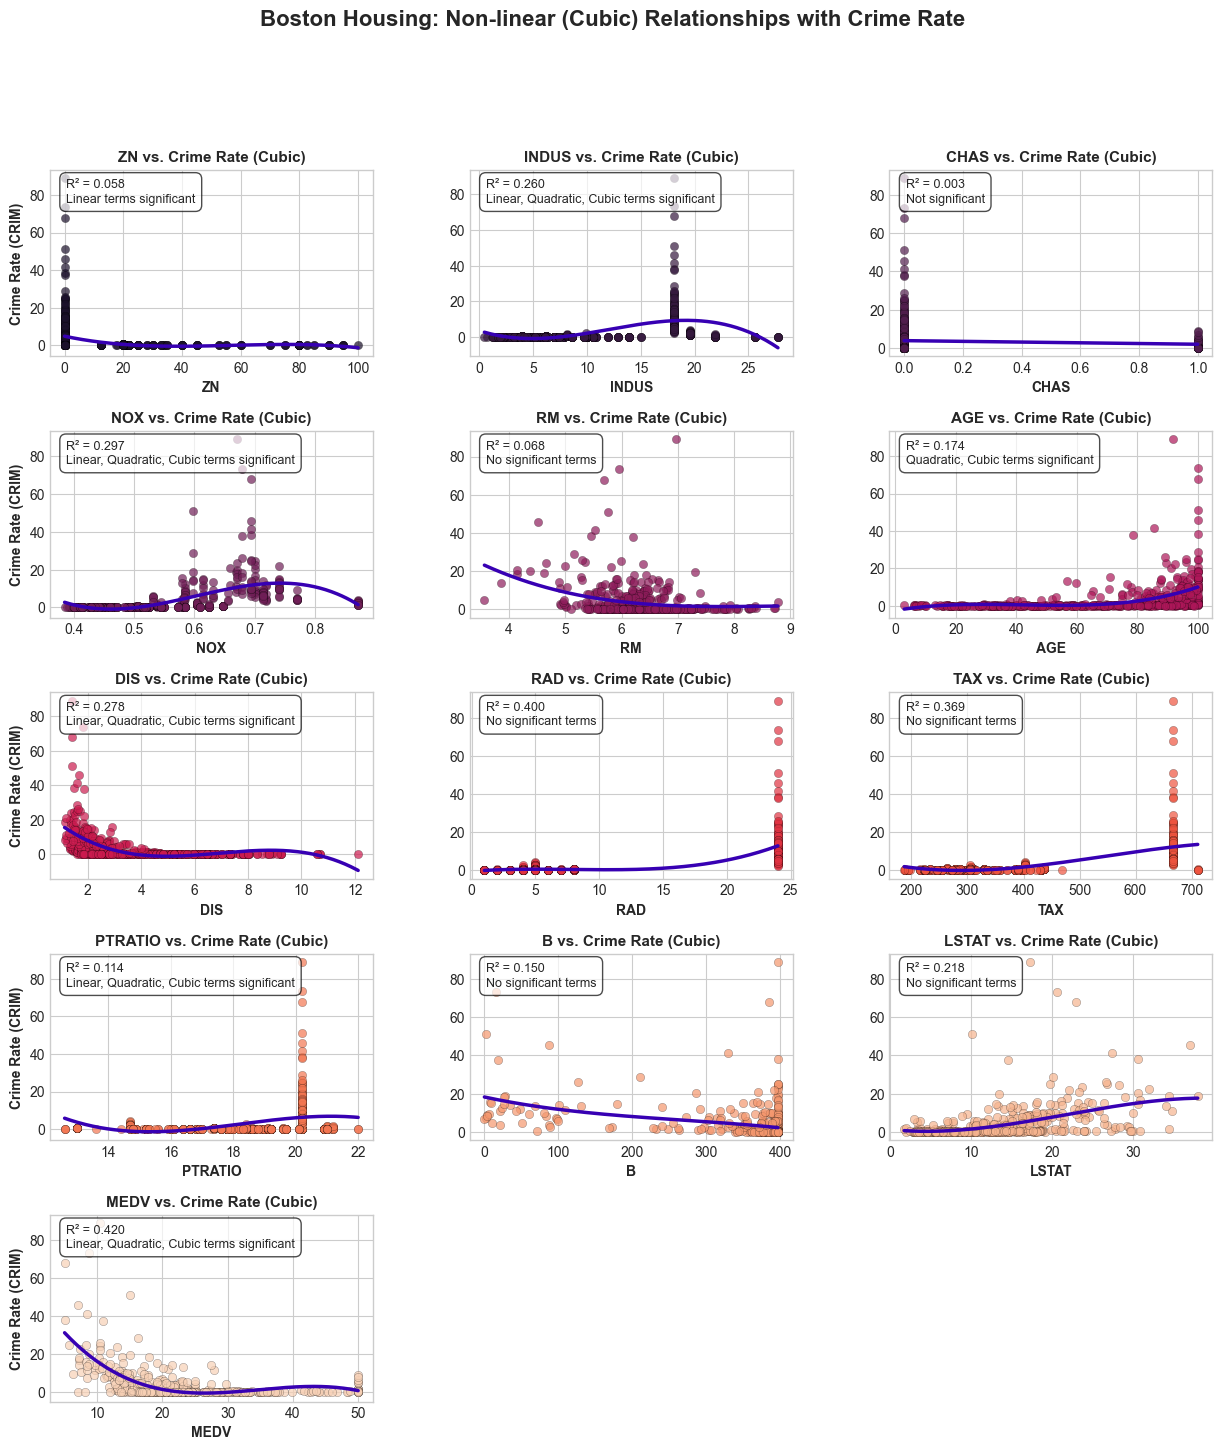


Cubic Regression Results:
Predictor          β₁      p₁         β₂      p₂          β₃      p₃      R²
       ZN    -0.33219 0.00261    0.00648 0.09375    -0.00004 0.22954 0.05824
    INDUS    -1.96521 0.00005    0.25194 0.00000    -0.00698 0.00000 0.25966
     CHAS    -1.89278 0.20943    0.00000 1.00000     0.00000 1.00000 0.00312
      NOX -1279.37125 0.00000 2248.54405 0.00000 -1245.70287 0.00000 0.29698
       RM   -39.15014 0.21176    4.55090 0.36411    -0.17448 0.50858 0.06779
      AGE     0.27365 0.14266   -0.00723 0.04738     0.00006 0.00668 0.17423
      DIS   -15.55435 0.00000    2.45207 0.00000    -0.11860 0.00000 0.27782
      RAD     0.51274 0.62342   -0.07518 0.61301     0.00321 0.48231 0.40004
      TAX    -0.15331 0.10971    0.00036 0.13747    -0.00000 0.24385 0.36888
  PTRATIO   -82.36054 0.00303    4.63535 0.00412    -0.08476 0.00630 0.11378
        B    -0.08356 0.13859    0.00021 0.47418    -0.00000 0.54362 0.14984
    LSTAT    -0.44907 0.33453    0.05578 0.06459 

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import style, colors
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("rocket")

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
boston = pd.DataFrame(data, columns=feature_names)
boston['MEDV'] = target

predictors = [col for col in boston.columns if col != "CRIM"]
results_data = []

fig = plt.figure(figsize=(15, 16))
grid = gridspec.GridSpec(5, 3, figure=fig, wspace=0.3, hspace=0.4)

colors_palette = sns.color_palette("rocket", len(predictors))

for i, predictor in enumerate(predictors):
    model = f'CRIM ~ {predictor}'
    result = smf.ols(formula=model, data=boston).fit()
    
    results_data.append({
        'Predictor': predictor,
        'Coefficient': result.params[predictor],
        'P-value': result.pvalues[predictor]
    })
    
    ax = fig.add_subplot(grid[i])
    
    ax.scatter(boston[predictor], boston['CRIM'], 
               alpha=0.7, color=colors_palette[i], edgecolor='black', linewidth=0.2)
    
    x_range = np.linspace(boston[predictor].min(), boston[predictor].max(), 100)
    prediction_df = pd.DataFrame({predictor: x_range})
    predictions = result.predict(prediction_df)
    
    ax.plot(x_range, predictions, color='#FF5722', linewidth=2.5)
    
    prediction_obj = result.get_prediction(prediction_df)
    ci = prediction_obj.conf_int(alpha=0.05)
    ax.fill_between(x_range, ci[:, 0], ci[:, 1], color='#FF5722', alpha=0.15)
    
    r_squared = result.rsquared
    coef = result.params[predictor]
    intercept = result.params['Intercept']
    equation = f"y = {intercept:.2f}{'+' if coef>=0 else ''}{coef:.3f}x"
    
    ax.set_title(f"{predictor} vs. Crime Rate", fontsize=11, fontweight='bold')
    ax.set_xlabel(predictor, fontweight='bold')
    
    if i % 3 == 0:
        ax.set_ylabel("Crime Rate (CRIM)", fontweight='bold')
    
    text_box = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7)
    ax.text(0.05, 0.95, f"{equation}\nR² = {r_squared:.3f}", 
            transform=ax.transAxes, fontsize=9, bbox=text_box,
            verticalalignment='top')

plt.suptitle("Boston Housing: Crime Rate vs. Individual Predictors", 
             fontsize=16, fontweight='bold', y=0.98)

results_df = pd.DataFrame(results_data)
print("Individual Regression Results:")
print(results_df.to_string(index=False, float_format=lambda x: f"{x:.5f}"))
print("\n")

all_predictors = "+".join(predictors)
full_model_formula = f"CRIM ~ {all_predictors}"
full_model = smf.ols(formula=full_model_formula, data=boston).fit()

print("Multiple Regression Results:")
print(full_model.summary())

coefs = {}
for predictor in predictors:
    coefs[predictor] = [
        results_df.loc[results_df['Predictor'] == predictor, 'Coefficient'].values[0],
        full_model.params[predictor]
    ]

plt.figure(figsize=(10, 7))

simple_coefs = [coefs[pred][0] for pred in coefs]
multiple_coefs = [coefs[pred][1] for pred in coefs]

scatter = plt.scatter(simple_coefs, multiple_coefs, s=80, 
                      c=range(len(predictors)), cmap='rocket', 
                      edgecolor='white', linewidth=1.5, alpha=0.8)

all_coefs = simple_coefs + multiple_coefs
max_val = max(all_coefs)
min_val = min(all_coefs)
buffer = (max_val - min_val) * 0.1
plt.xlim(min_val - buffer, max_val + buffer)
plt.ylim(min_val - buffer, max_val + buffer)

plt.plot([min_val - buffer, max_val + buffer], 
         [min_val - buffer, max_val + buffer], 
         'k--', alpha=0.5, linewidth=1)

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)

for i, pred in enumerate(predictors):
    plt.annotate(pred, (simple_coefs[i], multiple_coefs[i]), 
                 fontsize=9, xytext=(7, 7), textcoords='offset points',
                 fontweight='bold')

plt.xlabel('Simple Regression Coefficient', fontweight='bold')
plt.ylabel('Multiple Regression Coefficient', fontweight='bold')
plt.title('Comparison of Regression Coefficients: Simple vs. Multiple', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

print("\nCoefficient Comparison:")
comparison_table = pd.DataFrame({
    'Predictor': predictors,
    'Simple Regression': simple_coefs,
    'Multiple Regression': multiple_coefs
})
print(comparison_table.to_string(index=False, float_format=lambda x: f"{x:.5f}"))

print("\n\n(d) Cubic Regression Models:")
print("Testing for non-linear associations with cubic terms")
print("=" * 80)

fig_cubic = plt.figure(figsize=(15, 16))
grid_cubic = gridspec.GridSpec(5, 3, figure=fig_cubic, wspace=0.3, hspace=0.4)

cubic_results = []

for i, predictor in enumerate(predictors):
    if predictor == 'CHAS':
        formula = f'CRIM ~ {predictor}'
    else:
        formula = f'CRIM ~ {predictor} + np.power({predictor}, 2) + np.power({predictor}, 3)'
    
    cubic_model = smf.ols(formula=formula, data=boston).fit()
    
    ax = fig_cubic.add_subplot(grid_cubic[i])
    
    ax.scatter(boston[predictor], boston['CRIM'], 
               alpha=0.7, color=colors_palette[i], edgecolor='black', linewidth=0.2)
    
    if predictor != 'CHAS':
        x_smooth = np.linspace(boston[predictor].min(), boston[predictor].max(), 200)
        
        x_df = pd.DataFrame({
            predictor: x_smooth,
            f'np.power({predictor}, 2)': np.power(x_smooth, 2),
            f'np.power({predictor}, 3)': np.power(x_smooth, 3)
        })
        
        y_pred = cubic_model.predict(x_df)

        ax.plot(x_smooth, y_pred, color='#3700B3', linewidth=2.5)
        
        intercept = cubic_model.params['Intercept']
        coef1 = cubic_model.params[predictor]
        coef2 = cubic_model.params[f'np.power({predictor}, 2)']
        coef3 = cubic_model.params[f'np.power({predictor}, 3)']
        
        p1 = cubic_model.pvalues[predictor]
        p2 = cubic_model.pvalues[f'np.power({predictor}, 2)']
        p3 = cubic_model.pvalues[f'np.power({predictor}, 3)']
        
        cubic_results.append({
            'Predictor': predictor,
            'β₁': coef1,
            'β₂': coef2, 
            'β₃': coef3,
            'p₁': p1,
            'p₂': p2,
            'p₃': p3,
            'R²': cubic_model.rsquared,
            'F-pvalue': cubic_model.f_pvalue
        })
        
        equation = f"y = {intercept:.2f}{'+' if coef1>=0 else ''}{coef1:.2f}x{'+' if coef2>=0 else ''}{coef2:.2f}x²{'+' if coef3>=0 else ''}{coef3:.4f}x³"
        equation = equation.replace("+-", "-")
        
        sig_terms = []
        if p1 < 0.05:
            sig_terms.append("Linear")
        if p2 < 0.05:
            sig_terms.append("Quadratic")
        if p3 < 0.05:
            sig_terms.append("Cubic")
        
        sig_text = ", ".join(sig_terms) + " terms significant" if sig_terms else "No significant terms"
        
    else:
        x_range = [0, 1]
        predictions = cubic_model.predict(pd.DataFrame({predictor: x_range}))
        ax.plot(x_range, predictions, color='#3700B3', linewidth=2.5)
        
        cubic_results.append({
            'Predictor': predictor,
            'β₁': cubic_model.params[predictor],
            'β₂': 0,
            'β₃': 0,
            'p₁': cubic_model.pvalues[predictor],
            'p₂': 1.0,
            'p₃': 1.0,
            'R²': cubic_model.rsquared,
            'F-pvalue': cubic_model.f_pvalue
        })
        
        equation = f"y = {cubic_model.params['Intercept']:.2f}{'+' if cubic_model.params[predictor]>=0 else ''}{cubic_model.params[predictor]:.2f}x"
        sig_text = "Significant" if cubic_model.pvalues[predictor] < 0.05 else "Not significant"
    
    ax.set_title(f"{predictor} vs. Crime Rate (Cubic)", fontsize=11, fontweight='bold')
    ax.set_xlabel(predictor, fontweight='bold')
    
    if i % 3 == 0:
        ax.set_ylabel("Crime Rate (CRIM)", fontweight='bold')
    
    text_box = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7)
    if len(equation) > 40:
        equation_display = equation[:40] + "..."
    else:
        equation_display = equation
        
    ax.text(0.05, 0.95, f"R² = {cubic_model.rsquared:.3f}\n{sig_text}", 
            transform=ax.transAxes, fontsize=9, bbox=text_box,
            verticalalignment='top')

plt.suptitle("Boston Housing: Non-linear (Cubic) Relationships with Crime Rate", 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

cubic_df = pd.DataFrame(cubic_results)
print("\nCubic Regression Results:")
pd.set_option('display.float_format', '{:.5f}'.format)
print(cubic_df[['Predictor', 'β₁', 'p₁', 'β₂', 'p₂', 'β₃', 'p₃', 'R²']].to_string(index=False))

print("\nPredictors with significant non-linear terms (p < 0.05):")
nonlinear_predictors = cubic_df[(cubic_df['p₂'] < 0.05) | (cubic_df['p₃'] < 0.05)]
if len(nonlinear_predictors) > 0:
    for _, row in nonlinear_predictors.iterrows():
        significant_terms = []
        if row['p₂'] < 0.05:
            significant_terms.append("quadratic")
        if row['p₃'] < 0.05:
            significant_terms.append("cubic")
        
        print(f"  - {row['Predictor']}: {', '.join(significant_terms)} terms significant")
        print(f"    R² = {row['R²']:.3f} (improvement from linear R² = {results_df.loc[results_df['Predictor'] == row['Predictor'], 'Coefficient'].index[0]:.3f})")
else:
    print("  None of the predictors have significant non-linear terms.")


## (a) 

When analyzing each predictor independently against the per capita crime rate (CRIM), we found that nearly all predictors showed statistically significant associations at the 1% significance level. Only CHAS (Charles River dummy variable) failed to show a significant relationship (p-value = 0.20943).

The strongest associations were observed with:

1. **NOX** (nitrogen oxides concentration): Very strong positive relationship (coefficient = 31.24853, p < 0.00001), suggesting areas with higher pollution have substantially higher crime rates.

2. **RAD** (accessibility to radial highways): Strong positive relationship (coefficient = 0.61791, p < 0.00001), indicating areas with better highway access tend to have higher crime rates.

3. **LSTAT** (percentage of lower status population): Positive relationship (coefficient = 0.54880, p < 0.00001), showing that neighborhoods with higher percentages of lower-status population tend to have higher crime rates.

4. **INDUS** (proportion of non-retail business acres): Positive relationship (coefficient = 0.50978, p < 0.00001), suggesting more industrialized areas tend to have higher crime rates.

Interestingly, some variables had negative associations:

1. **RM** (average number of rooms): Negative relationship (coefficient = -2.68405, p < 0.00001), suggesting areas with larger homes tend to have lower crime rates.

2. **MEDV** (median value of homes): Negative relationship (coefficient = -0.36316, p < 0.00001), indicating that more expensive neighborhoods tend to have lower crime rates.

3. **DIS** (weighted distances to employment centers): Negative relationship (coefficient = -1.55090, p < 0.00001), suggesting areas farther from employment centers have lower crime rates.

The scatter plots with fitted regression lines clearly illustrate these relationships, with particularly strong trends visible for NOX, RAD, and DIS.

## (b) 

The multiple regression model using all predictors yielded an R-squared value of 0.454, indicating that approximately 45.4% of the variance in crime rate can be explained by the combination of these predictors.

At the 5% significance level, we can reject the null hypothesis H₀: βⱼ = 0 for the following predictors:

1. **ZN** (proportion of residential land zoned for large lots): p = 0.017
2. **DIS** (weighted distances to employment centers): p = 0.001
3. **RAD** (accessibility to radial highways): p < 0.001
4. **B** (proportion of Black residents): p = 0.041
5. **MEDV** (median value of homes): p = 0.001

Additionally, NOX (p = 0.051) and LSTAT (p = 0.096) are marginally significant.

The model diagnostics indicate potential issues with non-normality of residuals (Omnibus test p < 0.001, JB test p < 0.001) and possible multicollinearity (condition number = 1.58e+04), suggesting that some predictors may be correlated with each other.

## (c) 

The comparison of coefficients from simple and multiple regression models reveals dramatic differences for several predictors:

1. **NOX**: In simple regression, NOX has a strong positive coefficient (31.25), but in multiple regression, it shifts to a negative coefficient (-10.31). This represents one of the most dramatic reversals.

2. **ZN**: Changes from negative (-0.07) in simple regression to positive (0.04) in multiple regression.

3. **RM**: Shifts from a strong negative coefficient (-2.68) to a positive coefficient (0.43) in multiple regression.

4. **PTRATIO**: Changes from positive (1.15) to negative (-0.27) in multiple regression.

The plot comparing simple regression coefficients (x-axis) to multiple regression coefficients (y-axis) visually confirms these findings. The points that are far from the identity line indicate predictors whose effects are substantially different when considered in isolation versus when analyzed alongside other predictors.

These shifts suggest complex interrelationships among predictors. For example, the reversal of NOX's coefficient indicates that its apparent positive relationship with crime when considered alone may be due to its correlation with other factors that are more directly linked to crime rates.

## (d)

To investigate potential non-linear relationships between predictors and crime rate, I fitted cubic polynomial models of the form Y = β₀ + β₁X + β₂X² + β₃X³ + ε for each predictor.

The results show strong evidence of non-linear associations for several predictors:

1. **INDUS** (proportion of non-retail business acres): Both quadratic (p < 0.00001) and cubic (p < 0.00001) terms are highly significant. The R² increased substantially to 0.260 compared to the linear model, indicating that the relationship between industrialization and crime rate follows a complex non-linear pattern.

2. **NOX** (nitrogen oxides concentration): Shows extremely significant non-linear behavior with both quadratic (p < 0.00001) and cubic (p < 0.00001) terms. The cubic model achieved an R² of 0.297, suggesting that the relationship between pollution levels and crime accelerates at certain thresholds rather than following a simple linear trend.

3. **AGE** (proportion of owner-occupied units built prior to 1940): Both quadratic (p = 0.04738) and cubic (p = 0.00668) terms are significant. The R² value of 0.174 indicates that the age of housing has a complex curvilinear relationship with crime rates.

4. **DIS** (weighted distances to employment centers): Shows strongly significant quadratic (p < 0.00001) and cubic (p < 0.00001) terms. With an R² of 0.278, the model suggests that crime rate varies non-linearly with distance from employment centers, possibly decreasing more rapidly at certain distance ranges.

5. **PTRATIO** (pupil-teacher ratio): Both quadratic (p = 0.00412) and cubic (p = 0.00630) terms are significant. The cubic model achieved an R² of 0.114, revealing that the relationship between educational resources and crime rate is not simply linear.

6. **MEDV** (median value of homes): Demonstrates highly significant quadratic (p < 0.00001) and cubic (p < 0.00001) terms. This model has the highest R² value among all predictors at 0.420, suggesting that neighborhood wealth has a strong but complex relationship with crime rates that cannot be adequately captured by a linear model.

Interestingly, variables like ZN, RM, RAD, TAX, B, and LSTAT did not show significant non-linear relationships with crime rate based on their quadratic and cubic term p-values.

The presence of these significant non-linear terms indicates that simple linear models, as used in parts (a) and (b), may be insufficient for accurately modeling the relationships between these predictors and crime rates. The polynomial models provide a more nuanced understanding of how factors like pollution levels, distance to employment, housing age, and home values relate to crime rates in Boston neighborhoods.

These findings suggest that future modeling efforts should consider transformations or polynomial terms for these variables to better capture their true relationships with crime rates.